# [IAPR][iapr]: Lab 3 ‒  Classification


**Group ID:**17

**Author 1 (sciper):** Ben Haj Yahia AHMED (261217)  
**Author 2 (sciper):** Mahmoud Mohamed Nabegh Ahmed SAID (309264)   
**Author 3 (sciper):** Hongyu Gu (333804)   

**Release date:** 23.04.2021  
**Due date:** 07.05.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [3]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [4]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method (5 pts)
Using the Bayes method, give the expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data. Note that you do not need to solve the analytical expression. You can simply evaluate the function for each point on the plane to end up with a segmentation map.
For simplicity reasons, round the estimated parameters to the closest integer value.

D:\Anaconda\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


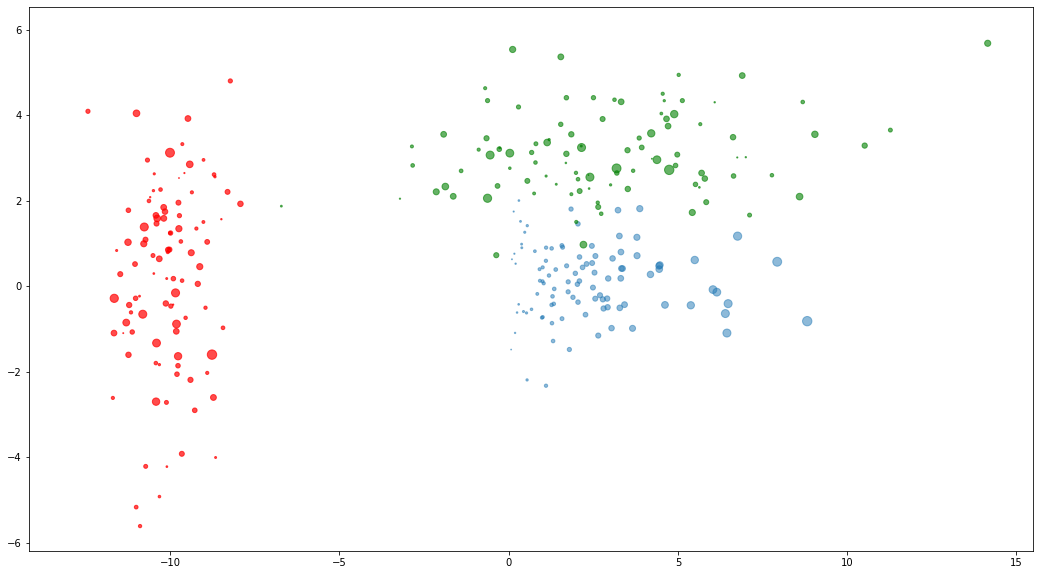

In [5]:
# Add your implementation and discussion

#data Visualization

area = a[:,0]*10
fig = plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.scatter(a[:,0], a[:,1], s=area, alpha=0.5)
ax.scatter(b[:,0], b[:,1], s=area, c='green', alpha=0.6)
ax.scatter(c[:,0], c[:,1], s=area, c='red', alpha=0.7)  
plt.show()



### 1.2 Mahalanobis distance (5 pts)
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

In [ ]:
# Add your implementation and discussion

---

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python. 

**! Warning**: When the lab was created the official MNIST repo was down, if it is still the case please use https://github.com/mkolod/MNIST.

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [6]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [7]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

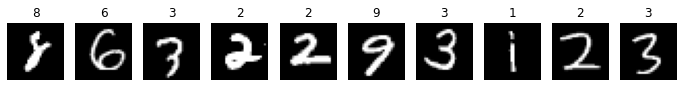

In [8]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

In [9]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


### 2.2 MLP (10 pts)

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [10]:
# Add your implementation and discussion

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

#data preprocessing

train_images = train_images.reshape(train_images.shape[0], -1) / 255
test_images = test_images.reshape(test_images.shape[0], -1) / 255

print(train_images.shape)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(train_images, train_labels)

print("Training set score: %f" % mlp.score(train_images, train_labels))
print("Test set score: %f" % mlp.score(test_images, test_labels))
print('number of layers：%s，output units：%s' % (mlp.n_layers_, mlp.n_outputs_))




(60000, 784)
Iteration 1, loss = 0.68319639
Iteration 2, loss = 0.40073128
Iteration 3, loss = 0.42009829
Iteration 4, loss = 0.42143761
Iteration 5, loss = 0.39819257
Iteration 6, loss = 0.41698236
Iteration 7, loss = 0.47066672
Iteration 8, loss = 0.42231403
Iteration 9, loss = 0.48003396
Iteration 10, loss = 0.51715718
Iteration 11, loss = 0.52614474
Iteration 12, loss = 0.48064114
Iteration 13, loss = 0.47160396
Iteration 14, loss = 0.46732995
Iteration 15, loss = 0.55650664
Iteration 16, loss = 0.47116221
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.884767
Test set score: 0.880900
number of layers：3，output units：10


1. initialize the Network

In [12]:
class Network(object):
    
    # Assign initial values to the weights and biases of each layer
    def _init_(self, sizes):   
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.weights = [np.random.randn(n,m) for m,n in zip(sizes[:-1], sizes[1:])]
        self.biases = [np.random.randn(n,1) for n in sizes[1:]]
        
    # use sigmoid function as the activation function
    def sigmoid(self, z):
        a=np.min(z) #to avoid division by inf
        return np.exp(a) / (np.exp(a) + np.exp(-z+a))
    
    #The derivative of the sigmoid function
    def sigmoid_derivative(self, z):
        s = self.sigmoid(z)
        return s* (1 - s)
    
    def forward(self, x):
        value = x
        for i in range(len(self.weight)):
            value = self.segmoid(np.dot(self.weights[i], value) + self.biases[i])
        y = value
        return y
   
    #use stochastic gradient descent
    #update_mini_batch is used to update the parameters
    def SGD(self, train_image, train_label, epochs, mini_batch_size, eta):
       
        for j in range(epochs):
           
            mini_batches_image = [train_image[k:k+mini_batch_size] for k in range(0, len(train_image), mini_batch_size)]
            mini_batches_label = [train_label[k:k+mini_batch_size] for k in range(0, len(train_label), mini_batch_size)]
            for mini_batch_image, mini_batch_label in zip(mini_batches_image, mini_batches_label):
                self.update_mini_batch(mini_batch_image, mini_batch_label, eta, mini_batch_size)
            print("Epoch{0}: accuracy is {1}/{2}".format(j+1, self.evaluate(test_image, test_label), len(test_image)))
                
    def update_mini_batch(self, mini_batch_image, mini_batch_label, eta, mini_batch_size):
       
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x,y in zip(mini_batch_image, mini_batch_label):
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/mini_batch_size)*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/mini_batch_size)*nb for b, nb in zip(self.biases, nabla_b)]
    
    def backprop(self, x, y):
       
        delta_nabla_b = [np.zeros(b.shape) for b in self.biases]
        delta_nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activations[-1]) + b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation)
        
        # First find the delta error of the last layer and the derivative of b and W
        cost = activations[-1] - y    
        delta = cost * self.sigmoid_prime(zs[-1])
        delta_nabla_b[-1] = delta
        delta_nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        # Backpropagation of the delta error and the derivatives of each layer b and W until the second layer
        for l in range(2, self.num_layers):
            delta = np.dot(self.weights[-l+1].transpose(), delta) * self.sigmoid_prime(zs[-l])
            delta_nabla_b[-l] = delta
            delta_nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return delta_nabla_b, delta_nabla_w
        
        
    #################################################
     how to evaluate the network
    
    def evaluate(self, images, labels):
        ###############################

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 79)

how to train the network

In [61]:
net_trained = 
net_trained.SGD

SyntaxError: invalid syntax (<ipython-input-61-e817525bb150>, line 1)